In [321]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [322]:
#reading the csv file
f=pd.read_csv('C:/Users/yskjh/OneDrive/Desktop/Yash/Assignments/ML/assgn1.csv')
f

,id,diagnosis,Classified,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [323]:
f.dropna(inplace=True)

## **PART A- Perceptron Learning Algorithm**
### Learning Task 1:
PM2 has a higher probability of getting linearly seperated than PM1

In [324]:
#Perceptron Code
#PM1
X_train=f.iloc[:,3:].sample(frac=0.67,random_state=1)#Inputs
Y_train=f.iloc[:,2].sample(frac=0.67,random_state=1)
w=[0]*(X_train.shape[1])#Intialize weight with zero

a=0.05
epochs=50
for i in range(epochs):
    z=np.dot(X_train,w)
    Y_pred=np.where(z>0,1,0)
    e=Y_train-Y_pred
    w=w+(a*np.dot(X_train.T, e))
    accuracy = 100 * np.mean(Y_train==Y_pred)
    print(f'Epoch {i+1}, Accuracy: {accuracy:.3f}%, Weights: {w}')

X_test=f.iloc[:,3:].drop(X_train.index)
Y_test=f.iloc[:,2].drop(Y_train.index)
z=np.dot(X_test,w)
Y_pred=np.where(z>1,1,0)
e=Y_test-Y_pred
accuracy = 100 * np.mean(Y_test==Y_pred)
p_Test=np.mean(Y_test==1)
p_pred=np.mean(Y_pred==1)
print(f'Testing result, Accuracy: {accuracy:.4f}%')
print(f'Testing data Precision:{p_Test:.3f}, Prediction precison:,{p_pred:.3f}')

Epoch 1, Accuracy: 63.130%, Weights: [1.2073350e+02 1.4806650e+02 7.9813000e+02 6.7176350e+03 7.1810950e-01
 1.0137970e+00 1.1314035e+00 6.1154100e-01 1.3450650e+00 4.3719450e-01
 4.1629400e+00 8.4373600e+00 2.9718750e+01 4.8066400e+02 4.7956450e-02
 2.2320715e-01 2.9843500e-01 1.0521005e-01 1.4672110e-01 2.8388600e-02
 1.4524700e+02 2.0055150e+02 9.7474050e+02 9.6355750e+03 1.0039745e+00
 2.5649135e+00 3.1412140e+00 1.2554840e+00 2.2431350e+00 6.3410550e-01]
Epoch 2, Accuracy: 36.870%, Weights: [-2.46240000e+01 -6.64770000e+01 -1.36414000e+02  1.14902000e+03
 -3.79288500e-01  4.86595000e-02  5.80876750e-01  3.01710700e-01
 -7.26305000e-01 -3.10101000e-01  8.04090000e-01 -6.19999500e+00
  6.01773500e+00  2.29178250e+02 -3.77922500e-02 -3.38095000e-02
 -5.83779500e-03 -1.14233500e-02 -1.00239900e-01 -1.40783900e-02
 -1.46516000e+01 -8.21215000e+01 -6.53730000e+01  2.93101000e+03
 -4.81310000e-01  3.51142500e-01  1.13113475e+00  3.57471900e-01
 -9.84905000e-01 -3.11821500e-01]
Epoch 3, A

In [325]:
#PM2
X_train=f.iloc[:,3:].sample(frac=0.67,random_state=200)#Inputs
Y_train=f.iloc[:,2].sample(frac=0.67,random_state=200)
w=[0]*(X_train.shape[1])#Intialize weight with zero

a=0.05
epochs=50
for i in range(epochs):
    z=np.dot(X_train,w)
    Y_pred=np.where(z>0,1,0)
    e=Y_train-Y_pred
    w=w+(a*np.dot(X_train.T, e))
    accuracy = 100 * np.mean(Y_train==Y_pred)
    print(f'Epoch {i+1}, Accuracy: {accuracy:.3f}%, Weights: {w}')

X_test=f.iloc[:,3:].drop(X_train.index)
Y_test=f.iloc[:,2].drop(Y_train.index)
z=np.dot(X_test,w)
Y_pred=np.where(z>1,1,0)
e=Y_test-Y_pred
accuracy = 100 * np.mean(Y_test==Y_pred)
p_Test=np.mean(Y_test==1)
p_pred=np.mean(Y_pred==1)
print(f'Testing result, Accuracy: {accuracy:.4f}%')
print(f'Testing data Precision:{p_Test:.3f}, Prediction precison:,{p_pred:.3f}')

Epoch 1, Accuracy: 61.538%, Weights: [1.2562600e+02 1.5675500e+02 8.3035050e+02 7.0003050e+03 7.5144900e-01
 1.0570020e+00 1.1761935e+00 6.4077400e-01 1.4023100e+00 4.5676550e-01
 4.2880450e+00 8.7388500e+00 3.0584550e+01 5.0990800e+02 4.9356550e-02
 2.3287565e-01 3.0401150e-01 1.0878310e-01 1.4824085e-01 2.9527750e-02
 1.5221000e+02 2.1324050e+02 1.0198015e+03 1.0234770e+04 1.0579010e+00
 2.7394070e+00 3.2896900e+00 1.3257215e+00 2.3605350e+00 6.6891950e-01]
Epoch 2, Accuracy: 38.462%, Weights: [-1.4520350e+01 -5.1916500e+01 -7.1012500e+01  1.6877050e+03
 -3.1937250e-01  1.1679800e-01  6.3282725e-01  3.4318875e-01
 -6.2955000e-01 -2.7530200e-01  9.9350000e-01 -5.1662850e+00
  6.9885950e+00  2.6550685e+02 -3.5136050e-02 -2.3840800e-02
 -4.3142450e-03 -4.9739000e-03 -9.5599150e-02 -1.3723400e-02
 -2.2475000e+00 -6.0355500e+01  1.3140500e+01  3.8091000e+03
 -3.9354050e-01  5.8595800e-01  1.3110595e+00  4.6084340e-01
 -8.1179000e-01 -2.5900100e-01]
Epoch 3, Accuracy: 38.462%, Weights: [-1

### Learning Task 2:
Normalized data(PM3) is found to be linearly seperable in comparision to PM1

In [326]:
#PM3
f.iloc[:,3:]=(f.iloc[:,3:]-f.iloc[:,3:].mean())/f.iloc[:,3:].std()
X_train=f.iloc[:,3:].sample(frac=0.67,random_state=1)#Inputs
Y_train=f.iloc[:,2].sample(frac=0.67,random_state=1)
w=[0]*(X_train.shape[1])#Intialize weight with zero

a=0.05
epochs=50
for i in range(epochs):
    z=np.dot(X_train,w)
    Y_pred=np.where(z>0,1,0)
    e=Y_train-Y_pred
    w=w+(a*np.dot(X_train.T, e))
    accuracy = 100 * np.mean(Y_train==Y_pred)
    print(f'Epoch {i+1}, Accuracy: {accuracy:.3f}%, Weights: {w}')

X_test=f.iloc[:,3:].drop(X_train.index)
Y_test=f.iloc[:,2].drop(Y_train.index)
z=np.dot(X_test,w)
Y_pred=np.where(z>1,1,0)
e=Y_test-Y_pred
accuracy = 100 * np.mean(Y_test==Y_pred)
p_Test=np.mean(Y_test==1)
p_pred=np.mean(Y_pred==1)
print(f'Testing result, Accuracy: {accuracy:.4f}%')
print(f'Testing data Precision:{p_Test:.3f}, Prediction precison:,{p_pred:.3f}')

Epoch 1, Accuracy: 63.130%, Weights: [ 6.39114655e+00  3.26757610e+00  6.53114106e+00  6.14522321e+00
  3.43956077e+00  5.42180355e+00  6.40853055e+00  6.97483890e+00
  3.12008639e+00  8.98437108e-02  4.84810882e+00 -1.63049811e-03
  4.82908804e+00  4.38576060e+00 -3.26729637e-01  2.54325328e+00
  2.51795828e+00  3.80111321e+00  4.65187664e-01  7.43477575e-01
  6.63360602e+00  3.58810965e+00  6.79449281e+00  6.14715598e+00
  3.64814303e+00  5.01565883e+00  5.93123620e+00  6.94205050e+00
  3.63209671e+00  2.76128509e+00]
Epoch 2, Accuracy: 92.838%, Weights: [ 6.78956476  3.8534438   6.84526419  6.49950503  2.86258155  4.29008215
  5.60627009  6.66390139  2.29025507 -1.54974075  4.99837537 -0.01766691
  4.82339524  4.58306513 -0.69362873  0.84073263  0.94221959  2.59523476
 -0.31381936 -1.01054958  7.07433213  4.33248695  7.13640697  6.52839109
  3.55112383  4.13406292  5.08735245  6.59784214  3.3177317   1.56776332]
Epoch 3, Accuracy: 95.491%, Weights: [ 6.81526259  4.27490135  6.830250

### Learning Task 3:
PM4 showed a better performance than PM1, which concludes that order of features do affect the performance

In [327]:
#PM4
g=pd.read_csv('C:/Users/yskjh/OneDrive/Desktop/Yash/Assignments/ML/assgn1.csv')
#Reversing order of features
g.dropna(inplace=True)
rev=list(g.iloc[:,3:].columns)
rev.reverse()
g_temp=f[rev]
X_train=g_temp.sample(frac=0.67,random_state=1)#Inputs
Y_train=f.iloc[:,2].sample(frac=0.67,random_state=1)
w=[0]*(X_train.shape[1])#Intialize weight with zero

a=0.05
epochs=50
for i in range(epochs):
    z=np.dot(X_train,w)
    Y_pred=np.where(z>0,1,0)
    e=Y_train-Y_pred
    w=w+(a*np.dot(X_train.T, e))
    accuracy = 100 * np.mean(Y_train==Y_pred)
    print(f'Epoch {i+1}, Accuracy: {accuracy:.3f}%, Weights: {w}')

X_test=f.iloc[:,3:].drop(X_train.index)
Y_test=f.iloc[:,2].drop(Y_train.index)
z=np.dot(X_test,w)
Y_pred=np.where(z>1,1,0)
accuracy = 100 * np.mean(Y_test==Y_pred)
p_Test=np.mean(Y_test==1)
p_pred=np.mean(Y_pred==1)
print(f'Testing result, Accuracy: {accuracy:.4f}%')
print(f'Testing data Precision:{p_Test:.3f}, Prediction precison:,{p_pred:.3f}')

Epoch 1, Accuracy: 63.130%, Weights: [ 2.76128509e+00  3.63209671e+00  6.94205050e+00  5.93123620e+00
  5.01565883e+00  3.64814303e+00  6.14715598e+00  6.79449281e+00
  3.58810965e+00  6.63360602e+00  7.43477575e-01  4.65187664e-01
  3.80111321e+00  2.51795828e+00  2.54325328e+00 -3.26729637e-01
  4.38576060e+00  4.82908804e+00 -1.63049811e-03  4.84810882e+00
  8.98437108e-02  3.12008639e+00  6.97483890e+00  6.40853055e+00
  5.42180355e+00  3.43956077e+00  6.14522321e+00  6.53114106e+00
  3.26757610e+00  6.39114655e+00]
Epoch 2, Accuracy: 92.838%, Weights: [ 1.56776332  3.3177317   6.59784214  5.08735245  4.13406292  3.55112383
  6.52839109  7.13640697  4.33248695  7.07433213 -1.01054958 -0.31381936
  2.59523476  0.94221959  0.84073263 -0.69362873  4.58306513  4.82339524
 -0.01766691  4.99837537 -1.54974075  2.29025507  6.66390139  5.60627009
  4.29008215  2.86258155  6.49950503  6.84526419  3.8534438   6.78956476]
Epoch 3, Accuracy: 95.491%, Weights: [ 1.07551551  3.02391134  6.357918

## **Part B – Fisher’s Linear Discriminant Analysis**
### Learning Task 1

In [328]:
#FLDM1
import numpy as np
from scipy.optimize import minimize_scalar
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Splitting dataset into training and testing
train=g.sample(frac=0.67,random_state=1)
test=g.drop(train.index)
X_train=train.iloc[:,3:]
y_train=train.iloc[:,2]
X_test=test.iloc[:,3:]
y_test=test.iloc[:,2]

#Projecting the model from 32 dimension to 1d for training and testing data of features
flda=LinearDiscriminantAnalysis(n_components=1)
flda.fit(X_train,y_train)
X_train_flda=flda.transform(X_train)
X_test_flda=flda.transform(X_test)

#mean and standard deviation for both classes
mean_M=np.mean(X_train_flda[y_train==1])
std_M=np.std(X_train_flda[y_train==1])
mean_B=np.mean(X_train_flda[y_train==0])
std_B=np.std(X_train_flda[y_train==0])

#Calculating parameters of Gaussian Distribution from mean and standard deviation
#Prior Probability of both classes
p_M=1*np.sum(y_train==1)/len(y_train)
p_B=1*np.sum(y_train==1)/len(y_train)
#Probability Distribution for both classes
gd_M= lambda x:1.0 / (std_M * np.sqrt(2*np.pi)) * np.exp(-0.5 * ((x-mean_M) / std_M)**2)
gd_B= lambda x:1.0 / (std_B * np.sqrt(2*np.pi)) * np.exp(-0.5 * ((x-mean_B) / std_B)**2)

#Decision boundary using Generative Approach
def objective(x):
    return np.log(gd_M(x)) + np.log(p_M) - np.log(gd_B(x)) - np.log(p_B)

res = minimize_scalar(objective)
decision_boundary = res.x
Y_pred=np.where(X_test_flda>decision_boundary,1,0)
accuracy=100 * np.mean(Y_test.to_numpy()==Y_pred)
accuracy

61.168921262573704

### Learning Task-2

In [329]:
#FLDM2

#Reversing order of features
rev=list(g.iloc[:,3:].columns)
rev.reverse()
g_temp=f[rev]

#Splitting dataset into training and testing
train=g.sample(frac=0.67,random_state=1)
test=g.drop(train.index)
X_train=g_temp.sample(frac=0.67,random_state=1)#Inputs
y_train=g.iloc[:,2].sample(frac=0.67,random_state=1)
X_test=test.iloc[:,3:]
Y_test=test.iloc[:,2]

#Projecting the model from 32 dimension to 1d for training and testing data of features
flda=LinearDiscriminantAnalysis(n_components=1)
flda.fit(X_train,y_train)
X_train_flda=flda.transform(X_train)
X_test_flda=flda.transform(X_test)

#mean and standard deviation for both classes
mean_M=np.mean(X_train_flda[y_train==1])
std_M=np.std(X_train_flda[y_train==1])
mean_B=np.mean(X_train_flda[y_train==0])
std_B=np.std(X_train_flda[y_train==0])

#Calculating parameters of Gaussian Distribution from mean and standard deviation
#Prior Probability of both classes
p_M=1*np.sum(y_train==1)/len(y_train)
p_B=1*np.sum(y_train==1)/len(y_train)
#Probability Distribution for both classes
gd_M= lambda x:1.0 / (std_M * np.sqrt(2*np.pi)) * np.exp(-0.5 * ((x-mean_M) / std_M)**2)
gd_B= lambda x:1.0 / (std_B * np.sqrt(2*np.pi)) * np.exp(-0.5 * ((x-mean_B) / std_B)**2)

#Decision boundary using Generative Approach
def objective(x):
    return np.log(gd_M(x)) + np.log(p_M) - np.log(gd_B(x)) - np.log(p_B)

res = minimize_scalar(objective)
decision_boundary = res.x
accuracy=100 * np.mean(Y_test.to_numpy()==Y_pred)
accuracy

61.168921262573704

## **PART C- Logistic Regression**
### Learning Task 2

Accuracy scores for learning rate 0.01: [0.6182795698924731, 0.6021505376344086, 0.6129032258064516, 0.6290322580645161, 0.6290322580645161]
Accuracy scores for learning rate 0.001: [0.6075268817204301, 0.543010752688172, 0.5913978494623656, 0.6129032258064516, 0.6344086021505376]
Accuracy scores for learning rate 0.0001: [0.6021505376344086, 0.3602150537634409, 0.44623655913978494, 0.6236559139784946, 0.6129032258064516]


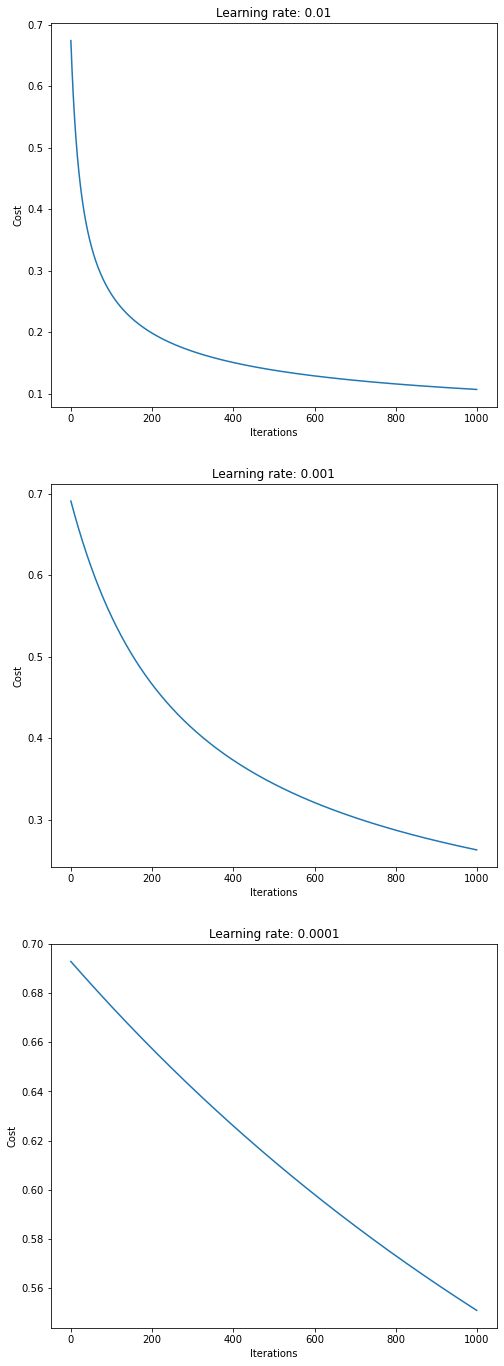

In [364]:
#LR1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Defining sigmoid function
def sig(x):
    return 1/(1+np.exp(-x))

#Defining Cost function
def cost_func(theta, X, y):
    m = len(y)
    h = sig(X.dot(theta))
    J = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return J

#Defining Batch Gradient descent algorithm
def bg_d(X,y,aplha,num_iters):
    m,n=X.shape
    theta=np.zeros(n)
    cf=np.zeros(num_iters)
    for i in range(num_iters):
        h = sig(np.dot(X, theta))
        theta= theta-(alpha/m) * np.dot(X.T, (h - y))
        cf[i]=cost_func(theta, X, y)
    return theta,cf

#main function
X_train=f.iloc[:,3:].sample(frac=0.67,random_state=1)
Y_train=f.iloc[:,2].sample(frac=0.67,random_state=1)
X_test=f.iloc[:,3:].drop(X_train.index)
Y_test=f.iloc[:,2].drop(Y_train.index)

learning_rates=[0.01,0.001,0.0001]
num_iters=1000
fig, axs = plt.subplots(len(learning_rates), figsize=(8, 24))
for i,alpha in enumerate(learning_rates):
    theta,cf=bg_d(X_train,Y_train,alpha,num_iters)
    
    #Plotting the learning curve
    axs[i].plot(range(num_iters), cf)
    axs[i].set_title(f'Learning rate: {alpha}')
    axs[i].set_xlabel('Iterations')
    axs[i].set_ylabel('Cost')
    
    # Test the model with varying decision probability thresholds
    thresholds = [0.5, 0.3, 0.4, 0.6, 0.7]
    accuracy_scores = []
    for threshold in thresholds:
        y_pred = (sig(np.dot(X_test, theta)) >= threshold).astype(int)
        accuracy_scores.append(np.mean(y_pred == y_test))
    print(f"Accuracy scores for learning rate {alpha}: {accuracy_scores}")

Threshold: 0.7, Learning Rate: 0.01
Accuracy: 0.98438


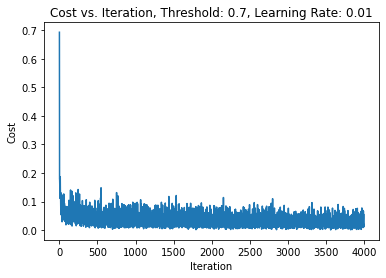

Threshold: 0.7, Learning Rate: 0.001
Accuracy: 0.95312


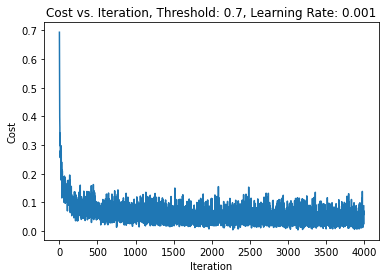

Threshold: 0.7, Learning Rate: 0.0001
Accuracy: 0.93750


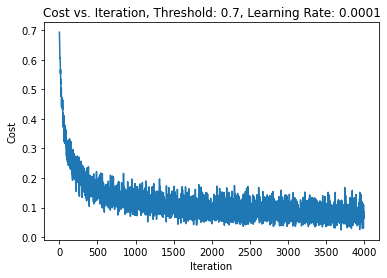

Threshold: 0.7, Learning Rate: 0.01
Accuracy: 1.00000


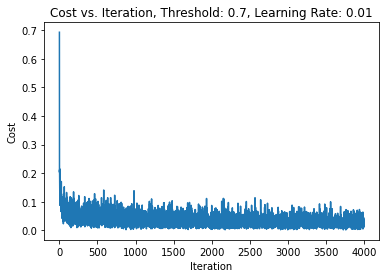

Threshold: 0.7, Learning Rate: 0.001
Accuracy: 0.98438


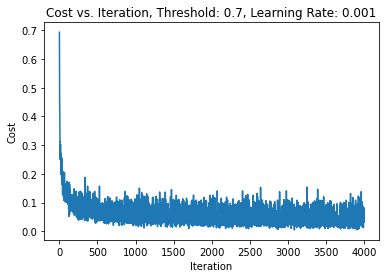

Threshold: 0.7, Learning Rate: 0.0001
Accuracy: 0.95312


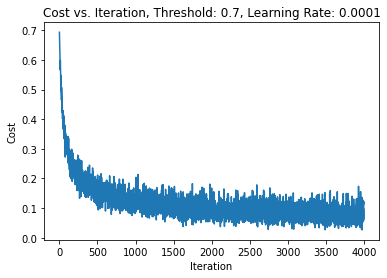

Threshold: 0.7, Learning Rate: 0.01
Accuracy: 0.98438


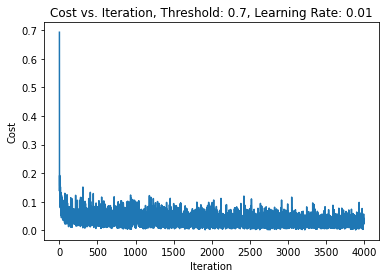

Threshold: 0.7, Learning Rate: 0.001
Accuracy: 1.00000


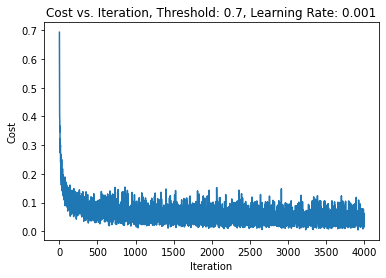

Threshold: 0.7, Learning Rate: 0.0001
Accuracy: 0.95312


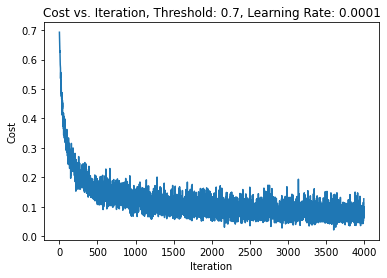

Threshold: 0.7, Learning Rate: 0.01
Accuracy: 0.98438


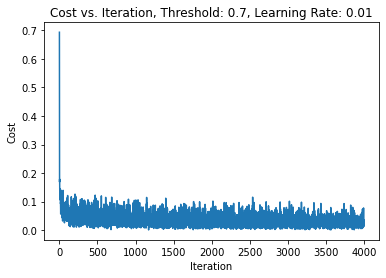

Threshold: 0.7, Learning Rate: 0.001
Accuracy: 0.98438


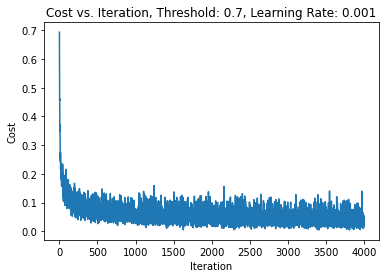

Threshold: 0.7, Learning Rate: 0.0001
Accuracy: 0.98438


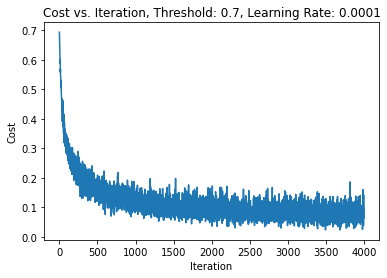

Threshold: 0.7, Learning Rate: 0.01
Accuracy: 1.00000


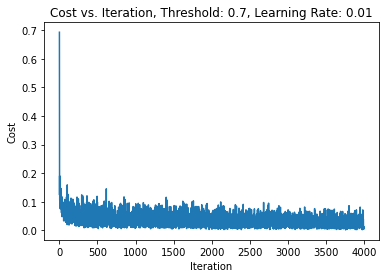

Threshold: 0.7, Learning Rate: 0.001
Accuracy: 0.96875


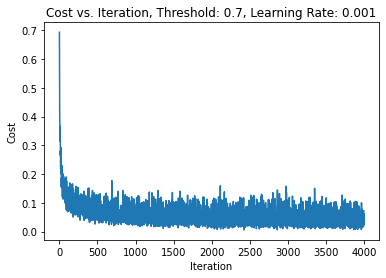

Threshold: 0.7, Learning Rate: 0.0001
Accuracy: 0.93750


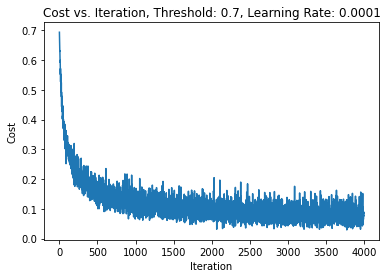

In [365]:
def sigmoid_activation(result):
    final_result = 1/(1+np.exp(-result))
    return final_result

def mbg_d(X_train, Y_train, learning_rate, num_iter, batch_size, probability_threshold):
    # initialize weights
    weights = np.zeros(X_train.shape[1])
    bias = 0
    max_accuracy = 0
    chkptw = 0
    chkptb = 0
    accuracy = 0
    activated_output = 0
    costs = []
    epsilon = 1e-5
    nrows = X_train.shape[0]
    
    choices = np.random.choice(nrows, replace=False, size=batch_size)
    x_train = X_train.iloc[choices]
    y_train = Y_train.iloc[choices]
    for i in range(int(num_iter)):
        weighted_sum = np.dot(x_train, weights) + bias
        # activate
        activated_output = sigmoid_activation(weighted_sum)

        # calculate error
        error = y_train - activated_output

        cost = -np.mean(y_train*np.log(activated_output + epsilon) + (1-y_train)*np.log(1-activated_output + epsilon))
        costs.append(cost)

        # adjust weights
        weights += learning_rate * np.dot(x_train.T, error)
        # adjust bias
        bias += learning_rate * error.sum()
        # calculate accuracy
        predictions = np.where(activated_output >= probability_threshold, 1, 0)
        accuracy = (predictions == y_train).mean()
        if accuracy > max_accuracy:
            max_accuracy = accuracy
            chkptw = weights
            chkptb = bias
        choices = np.random.choice(nrows, replace=False, size=batch_size)
        x_train = X_train.iloc[choices]
        y_train = Y_train.iloc[choices]

    print("Accuracy: {:.5f}".format(accuracy))
    plt.plot(costs)
    return chkptw, chkptb


# Initialize thresholds and learning rates
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
learning_rates = [0.01, 0.001, 0.0001]

# Iterate over all combinations of thresholds and learning rates
for i in thresholds:
    for learning_rate in learning_rates:
        print(f"Threshold: {threshold}, Learning Rate: {learning_rate}")
        w, bias = mbg_d(X_train, Y_train, learning_rate=learning_rate, num_iter=4000, batch_size=64, probability_threshold=i)
        plt.title(f"Cost vs. Iteration, Threshold: {threshold}, Learning Rate: {learning_rate}")
        plt.xlabel("Iteration")
        plt.ylabel("Cost")
        plt.show()

Threshold: 0.5, Learning Rate: 0.01
Accuracy: 0.98408


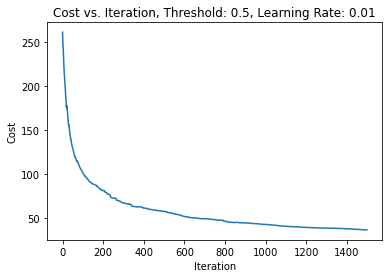

Threshold: 0.5, Learning Rate: 0.001
Accuracy: 0.94695


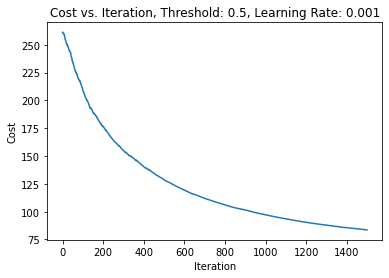

Threshold: 0.5, Learning Rate: 0.0001
Accuracy: 0.93369


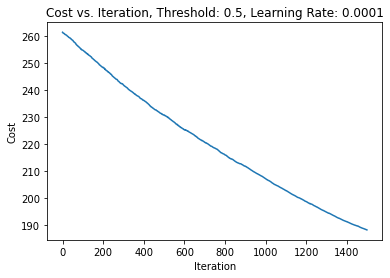

Threshold: 0.3, Learning Rate: 0.01
Accuracy: 0.95225


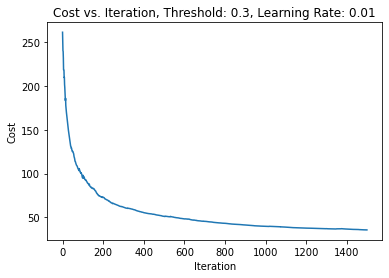

Threshold: 0.3, Learning Rate: 0.001
Accuracy: 0.88859


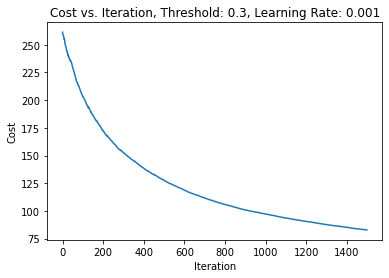

Threshold: 0.3, Learning Rate: 0.0001
Accuracy: 0.38727


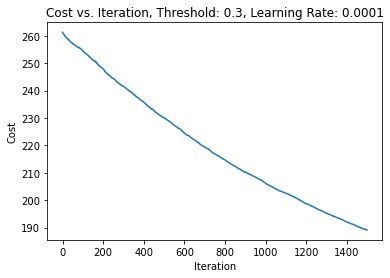

Threshold: 0.4, Learning Rate: 0.01
Accuracy: 0.97347


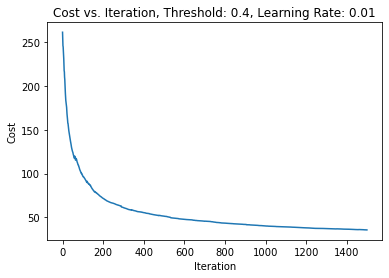

Threshold: 0.4, Learning Rate: 0.001
Accuracy: 0.92838


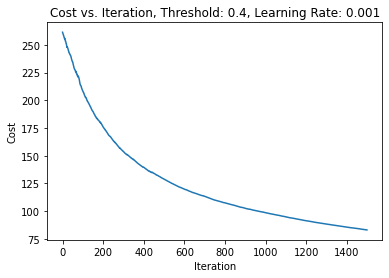

Threshold: 0.4, Learning Rate: 0.0001
Accuracy: 0.68435


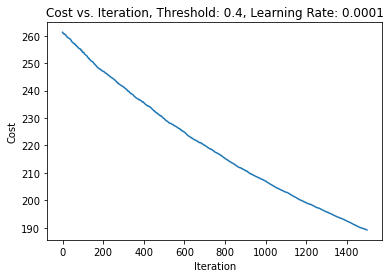

Threshold: 0.6, Learning Rate: 0.01
Accuracy: 0.97347


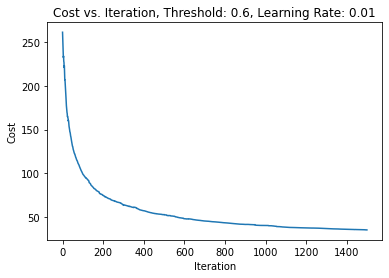

Threshold: 0.6, Learning Rate: 0.001
Accuracy: 0.93899


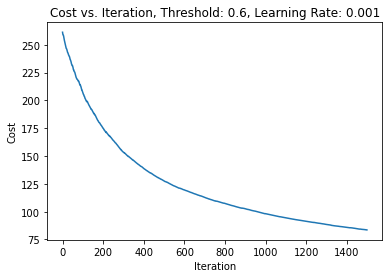

Threshold: 0.6, Learning Rate: 0.0001
Accuracy: 0.85146


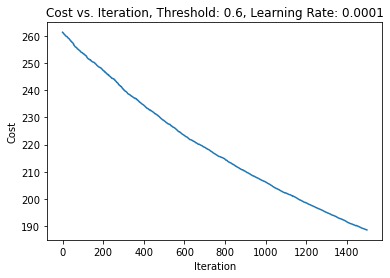

Threshold: 0.7, Learning Rate: 0.01
Accuracy: 0.95756


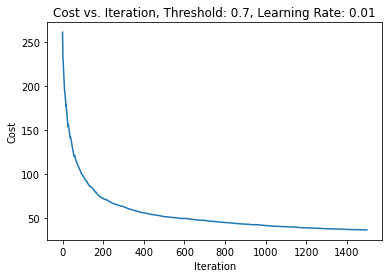

Threshold: 0.7, Learning Rate: 0.001
Accuracy: 0.92573


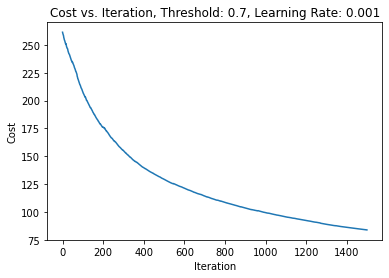

Threshold: 0.7, Learning Rate: 0.0001
Accuracy: 0.71883


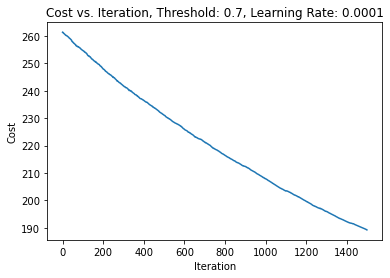

In [344]:
def compute_accuracy(X_train, Y_train, weights, bias, probability_threshold):
    accuracy = 0
    # weighted sum of inputs / weights
    weighted_sum = np.dot(X_train, weights) + bias
    # activate
    activated_output = sigmoid_activation(weighted_sum)
    # calculate accuracy
    predictions = np.where(activated_output >= probability_threshold, 1, 0)
    accuracy = (predictions == Y_train).mean()
    return accuracy

def sigmoid_activation(result):
    final_result = 1/(1+np.exp(-result))
    return final_result

def sg_d(X_train, Y_train, learning_rate, num_iter, probability_threshold):
    batch_size = 1
    
    # initialize weights
    weights = np.zeros(X_train.shape[1])
    bias = 0
    max_accuracy = 0
    chkptw = 0
    chkptb = 0
    accuracy = 0
    activated_output = 0
    costs = []
    epsilon = 1e-5
    nrows = X_train.shape[0]
    
    choices = np.random.choice(nrows, replace=False, size = batch_size)
    x_train = X_train.iloc[choices]
    y_train = Y_train.iloc[choices]
    for i in range(int(num_iter)):
        weighted_sum = np.dot(x_train, weights) + bias
        
        # activate
        activated_output = sigmoid_activation(weighted_sum)

        # calculate error
        error = y_train - activated_output

        total_weighted_sum = np.dot(X_train, weights) + bias
        total_activated_output = sigmoid_activation(total_weighted_sum)
        cost = -np.sum(Y_train*np.log(total_activated_output + epsilon) + (1-Y_train)*np.log(1-total_activated_output + epsilon))
        costs.append(cost)

        # adjust weights
        weights += learning_rate * np.dot(x_train.T, error)
        # adjust bias
        bias += learning_rate * error.sum()
        
        # calculate accuracy
        predictions = np.where(activated_output >= probability_threshold, 1, 0)
        accuracy = (predictions == y_train).mean()
        if accuracy > max_accuracy:
            max_accuracy = accuracy
            chkptw = weights
            chkptb = bias
        choices = np.random.choice(nrows, replace=False, size = batch_size)
        x_train = X_train.iloc[choices]
        y_train = Y_train.iloc[choices]
        
    accuracy = compute_accuracy(X_train, Y_train, weights, bias, probability_threshold = probability_threshold)
    print("Accuracy: {:.5f}".format(accuracy))
    plt.plot(costs)    
    return weights, bias


# Iterate over all combinations of thresholds and learning rates
for threshold in thresholds:
    for learning_rate in learning_rates:
        print(f"Threshold: {threshold}, Learning Rate: {learning_rate}")
        w, bias = sg_d(X_train, Y_train, learning_rate=learning_rate, num_iter=1500, probability_threshold=threshold)
        plt.title(f"Cost vs. Iteration, Threshold: {threshold}, Learning Rate: {learning_rate}")
        plt.xlabel("Iteration")
        plt.ylabel("Cost")
        plt.show()

## **PART D:Comparitive Study**

In [372]:
import random
randomlist = []
for i in range(0,10):
    n = random.randint(1,1000)
    randomlist.append(n)

#Perceptron Code
#PM1
print("PM1")
for i in randomlist:
    #Perceptron Code
    X_train=g.iloc[:,3:].sample(frac=0.67,random_state=i)#Inputs
    Y_train=g.iloc[:,2].sample(frac=0.67,random_state=i)
    w=[0]*(X_train.shape[1])#Intialize weight with zero

    a=0.1
    epochs=100
    for i in range(epochs):
        z=np.dot(X_train,w)
        Y_pred=np.where(z>0,1,0)
        e=Y_train-Y_pred
        w=w+(a*np.dot(X_train.T, e))
        accuracy = 100 * np.mean(Y_train==Y_pred)
        
    X_test=f.iloc[:,3:].drop(X_train.index)
    Y_test=f.iloc[:,2].drop(Y_train.index)
    z=np.dot(X_test,w)
    Y_pred=np.where(z>1,1,0)
    e=Y_test-Y_pred
    accuracy = 100 * np.mean(Y_test==Y_pred)
    p_Test=np.mean(Y_test==1)
    p_pred=np.mean(Y_pred==1)
    print(f'Testing result, Accuracy: {accuracy:.4f}%')
    print(f'Testing data Precision:{p_Test:.3f}, Prediction precison:,{p_pred:.3f}')
print("")
print("PM2")
for i in randomlist:
    X_train=g.iloc[:,3:].sample(frac=0.67,random_state=1000-1)#Inputs
    Y_train=g.iloc[:,2].sample(frac=0.67,random_state=1000-i)
    w=[0]*(X_train.shape[1])#Intialize weight with zero

    a=0.05
    epochs=100
    for i in range(epochs):
        z=np.dot(X_train,w)
        Y_pred=np.where(z>0,1,0)
        e=Y_train-Y_pred
        w=w+(a*np.dot(X_train.T, e))
        accuracy = 100 * np.mean(Y_train==Y_pred)
        
    X_test=f.iloc[:,3:].drop(X_train.index)
    Y_test=f.iloc[:,2].drop(Y_train.index)
    z=np.dot(X_test,w)
    Y_pred=np.where(z>1,1,0)
    e=Y_test-Y_pred
    accuracy = 100 * np.mean(Y_test==Y_pred)
    p_Test=np.mean(Y_test==1)
    p_pred=np.mean(Y_pred==1)
    print(f'Testing result, Accuracy: {accuracy:.4f}%')
    print(f'Testing data Precision:{p_Test:.3f}, Prediction precison:,{p_pred:.3f}')

print("")
print("PM3")
for i in randomlist:
    X_train=f.iloc[:,3:].sample(frac=0.67,random_state=i)#Inputs
    Y_train=f.iloc[:,2].sample(frac=0.67,random_state=i)
    w=[0]*(X_train.shape[1])#Intialize weight with zero

    a=0.05
    epochs=100
    for i in range(epochs):
        z=np.dot(X_train,w)
        Y_pred=np.where(z>0,1,0)
        e=Y_train-Y_pred
        w=w+(a*np.dot(X_train.T, e))
        accuracy = 100 * np.mean(Y_train==Y_pred)

    X_test=f.iloc[:,3:].drop(X_train.index)
    Y_test=f.iloc[:,2].drop(Y_train.index)
    z=np.dot(X_test,w)
    Y_pred=np.where(z>1,1,0)
    e=Y_test-Y_pred
    accuracy = 100 * np.mean(Y_test==Y_pred)
    p_Test=np.mean(Y_test==1)
    p_pred=np.mean(Y_pred==1)
    print(f'Testing result, Accuracy: {accuracy:.4f}%')
    print(f'Testing data Precision:{p_Test:.3f}, Prediction precison:,{p_pred:.3f}')

print("")
print("PM4")
for i in randomlist:
    rev=list(g.iloc[:,3:].columns)
    rev.reverse()
    g_temp=f[rev]
    X_train=g_temp.sample(frac=0.67,random_state=i)#Inputs
    Y_train=f.iloc[:,2].sample(frac=0.67,random_state=i)
    w=[0]*(X_train.shape[1])#Intialize weight with zero

    a=0.05
    epochs=100
    for i in range(epochs):
        z=np.dot(X_train,w)
        Y_pred=np.where(z>0,1,0)
        e=Y_train-Y_pred
        w=w+(a*np.dot(X_train.T, e))
        accuracy = 100 * np.mean(Y_train==Y_pred)
        
    X_test=f.iloc[:,3:].drop(X_train.index)
    Y_test=f.iloc[:,2].drop(Y_train.index)
    z=np.dot(X_test,w)
    Y_pred=np.where(z>1,1,0)
    accuracy = 100 * np.mean(Y_test==Y_pred)
    p_Test=np.mean(Y_test==1)
    p_pred=np.mean(Y_pred==1)
    print(f'Testing result, Accuracy: {accuracy:.4f}%')
    print(f'Testing data Precision:{p_Test:.3f}, Prediction precison:,{p_pred:.3f}')

PM1
Testing result, Accuracy: 6.4516%
Testing data Precision:0.387, Prediction precison:,0.602
Testing result, Accuracy: 6.4516%
Testing data Precision:0.387, Prediction precison:,0.602
Testing result, Accuracy: 6.4516%
Testing data Precision:0.387, Prediction precison:,0.602
Testing result, Accuracy: 6.4516%
Testing data Precision:0.387, Prediction precison:,0.602
Testing result, Accuracy: 6.4516%
Testing data Precision:0.387, Prediction precison:,0.602
Testing result, Accuracy: 6.4516%
Testing data Precision:0.387, Prediction precison:,0.602
Testing result, Accuracy: 6.4516%
Testing data Precision:0.387, Prediction precison:,0.602
Testing result, Accuracy: 6.4516%
Testing data Precision:0.387, Prediction precison:,0.602
Testing result, Accuracy: 6.4516%
Testing data Precision:0.387, Prediction precison:,0.602
Testing result, Accuracy: 6.4516%
Testing data Precision:0.387, Prediction precison:,0.602

PM2
Testing result, Accuracy: 12.3656%
Testing data Precision:0.366, Prediction preci

In [334]:
import numpy as np
from scipy.optimize import minimize_scalar
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
print("")
print("FLDA1")
#FLDA1
for i in randomlist:
    #Splitting dataset into training and testing
    train=g.sample(frac=0.67,random_state=i)
    test=g.drop(train.index)
    X_train=train.iloc[:,3:]
    y_train=train.iloc[:,2]
    X_test=test.iloc[:,3:]
    y_test=test.iloc[:,2]

    #Projecting the model from 32 dimension to 1d for training and testing data of features
    flda=LinearDiscriminantAnalysis(n_components=1)
    flda.fit(X_train,y_train)
    X_train_flda=flda.transform(X_train)
    X_test_flda=flda.transform(X_test)

    #mean and standard deviation for both classes
    mean_M=np.mean(X_train_flda[y_train==1])
    std_M=np.std(X_train_flda[y_train==1])
    mean_B=np.mean(X_train_flda[y_train==0])
    std_B=np.std(X_train_flda[y_train==0])

    #Calculating parameters of Gaussian Distribution from mean and standard deviation
    #Prior Probability of both classes
    p_M=1*np.sum(y_train==1)/len(y_train)
    p_B=1*np.sum(y_train==1)/len(y_train)
    #Probability Distribution for both classes
    gd_M= lambda x:1.0 / (std_M * np.sqrt(2*np.pi)) * np.exp(-0.5 * ((x-mean_M) / std_M)**2)
    gd_B= lambda x:1.0 / (std_B * np.sqrt(2*np.pi)) * np.exp(-0.5 * ((x-mean_B) / std_B)**2)

    #Decision boundary using Generative Approach
    def objective(x):
        return np.log(gd_M(x)) + np.log(p_M) - np.log(gd_B(x)) - np.log(p_B)

    res = minimize_scalar(objective)
    decision_boundary = res.x
    Y_pred=np.where(X_test_flda>decision_boundary,1,0)
    accuracy=100 * np.mean(Y_test.to_numpy()==Y_pred)
    print(accuracy)

#FLDM2
print("")
print("FLDA2")
for i in randomlist:
    #Reversing order of features
    rev=list(g.iloc[:,3:].columns)
    rev.reverse()
    g_temp=f[rev]

    #Splitting dataset into training and testing
    train=g.sample(frac=0.67,random_state=i)
    test=g.drop(train.index)
    X_train=g_temp.sample(frac=0.67,random_state=1)#Inputs
    y_train=g.iloc[:,2].sample(frac=0.67,random_state=1)
    X_test=test.iloc[:,3:]
    Y_test=test.iloc[:,2]

    #Projecting the model from 32 dimension to 1d for training and testing data of features
    flda=LinearDiscriminantAnalysis(n_components=1)
    flda.fit(X_train,y_train)
    X_train_flda=flda.transform(X_train)
    X_test_flda=flda.transform(X_test)

    #mean and standard deviation for both classes
    mean_M=np.mean(X_train_flda[y_train==1])
    std_M=np.std(X_train_flda[y_train==1])
    mean_B=np.mean(X_train_flda[y_train==0])
    std_B=np.std(X_train_flda[y_train==0])

    #Calculating parameters of Gaussian Distribution from mean and standard deviation
    #Prior Probability of both classes
    p_M=1*np.sum(y_train==1)/len(y_train)
    p_B=1*np.sum(y_train==1)/len(y_train)
    #Probability Distribution for both classes
    gd_M= lambda x:1.0 / (std_M * np.sqrt(2*np.pi)) * np.exp(-0.5 * ((x-mean_M) / std_M)**2)
    gd_B= lambda x:1.0 / (std_B * np.sqrt(2*np.pi)) * np.exp(-0.5 * ((x-mean_B) / std_B)**2)

    #Decision boundary using Generative Approach
    def objective(x):
        return np.log(gd_M(x)) + np.log(p_M) - np.log(gd_B(x)) - np.log(p_B)

    res = minimize_scalar(objective)
    decision_boundary = res.x
    accuracy=100 * np.mean(Y_test.to_numpy()==Y_pred)
    print(accuracy)


FLDA1
61.29032258064516
61.29032258064516
61.168921262573704
61.29032258064516
61.168921262573704
38.831078737426296
61.04751994450226
61.168921262573704
38.70967741935484
38.70967741935484

FLDA2
35.483870967741936
34.946236559139784
39.784946236559136
36.55913978494624
39.784946236559136
41.39784946236559
41.935483870967744
32.25806451612903
35.483870967741936
36.02150537634409


LR1
Batch Gradient
TrialNo. 1
Accuracy scores for learning rate 0.01: [0.521505376344086, 0.510752688172043, 0.521505376344086, 0.543010752688172, 0.543010752688172]
Accuracy scores for learning rate 0.001: [0.5053763440860215, 0.5053763440860215, 0.489247311827957, 0.532258064516129, 0.5591397849462365]
Accuracy scores for learning rate 0.0001: [0.521505376344086, 0.3602150537634409, 0.46236559139784944, 0.5860215053763441, 0.6236559139784946]
TrialNo. 2
Accuracy scores for learning rate 0.01: [0.6236559139784946, 0.5913978494623656, 0.6021505376344086, 0.6236559139784946, 0.6397849462365591]
Accuracy scores for learning rate 0.001: [0.6075268817204301, 0.543010752688172, 0.5806451612903226, 0.6182795698924731, 0.6290322580645161]
Accuracy scores for learning rate 0.0001: [0.6021505376344086, 0.3602150537634409, 0.3978494623655914, 0.6451612903225806, 0.6559139784946236]
TrialNo. 3
Accuracy scores for learning rate 0.01: [0.6075268817204301, 0.5806451612903226, 0.6021505376344086, 0.6

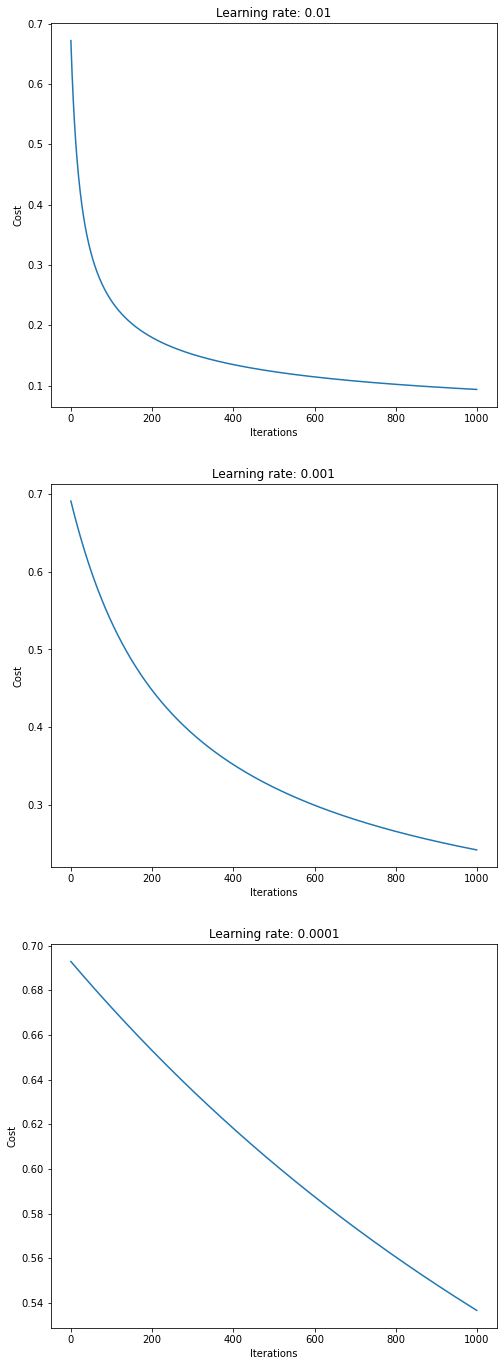

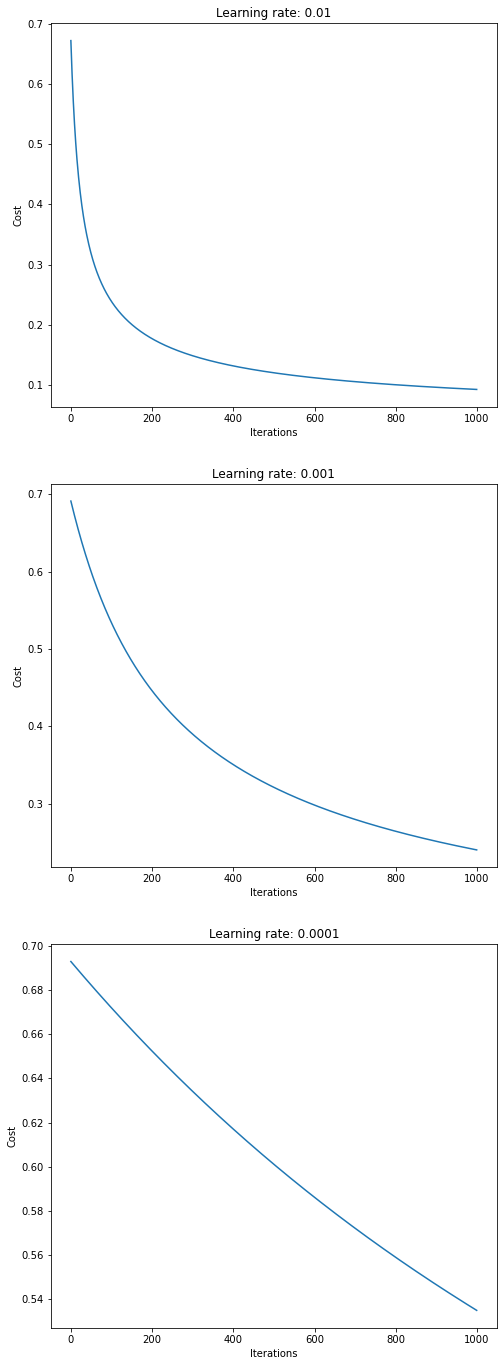

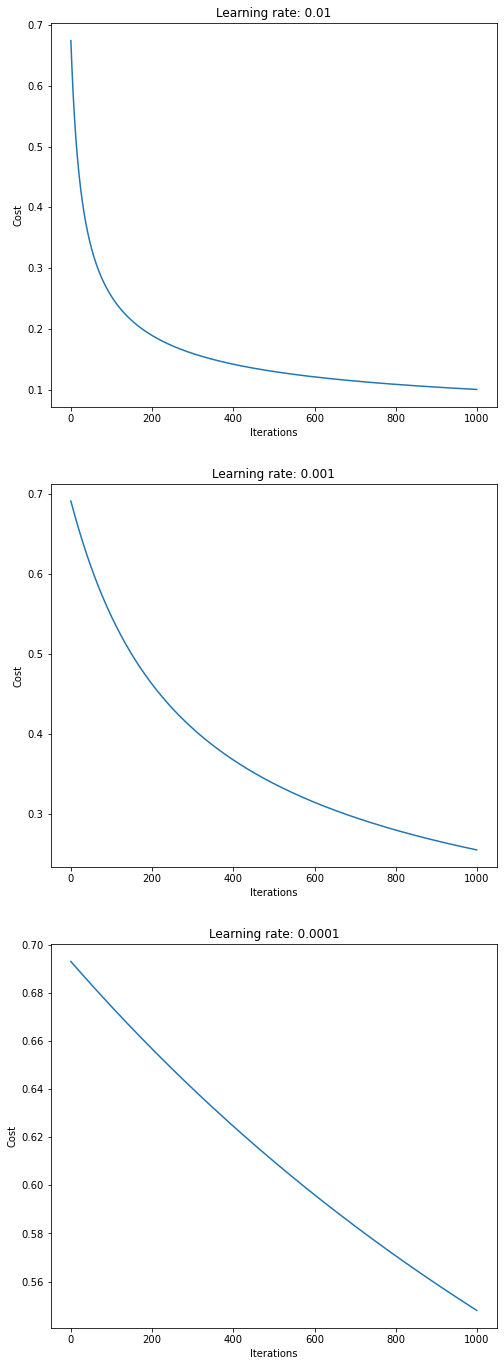

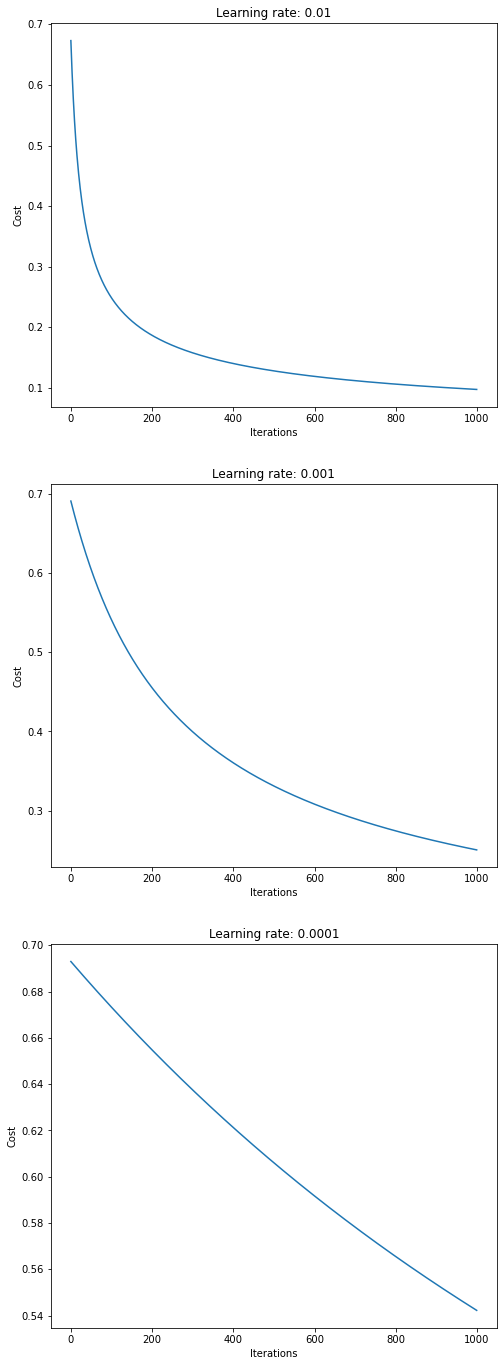

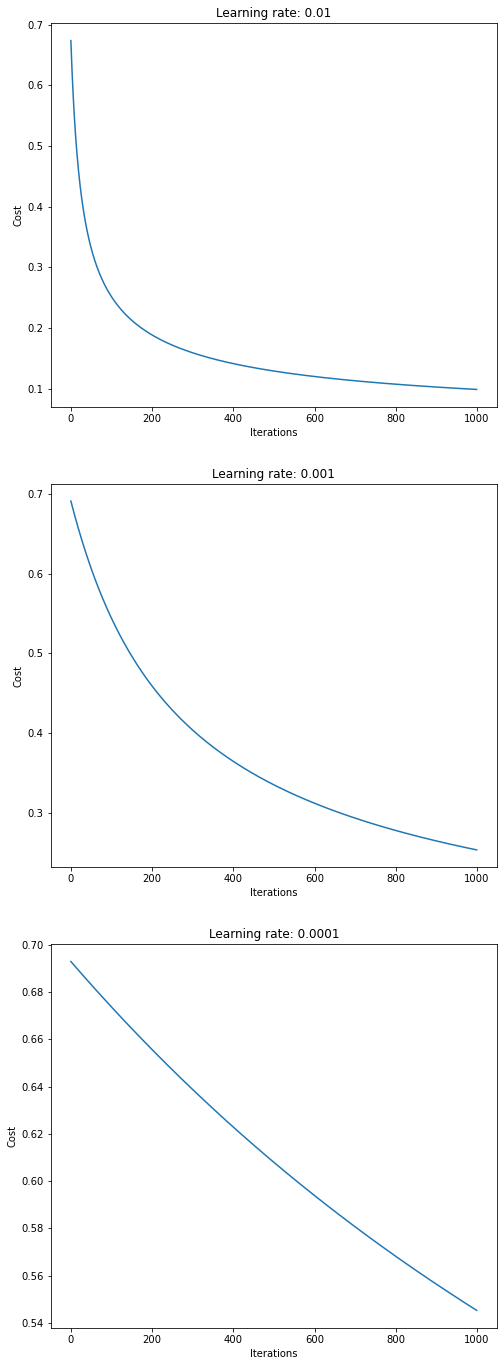

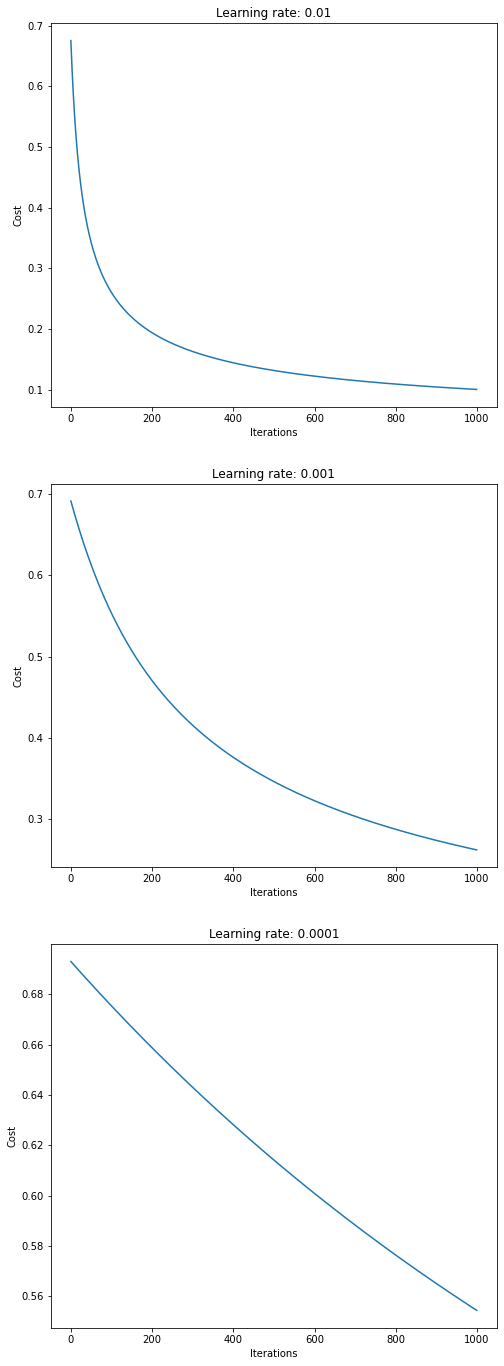

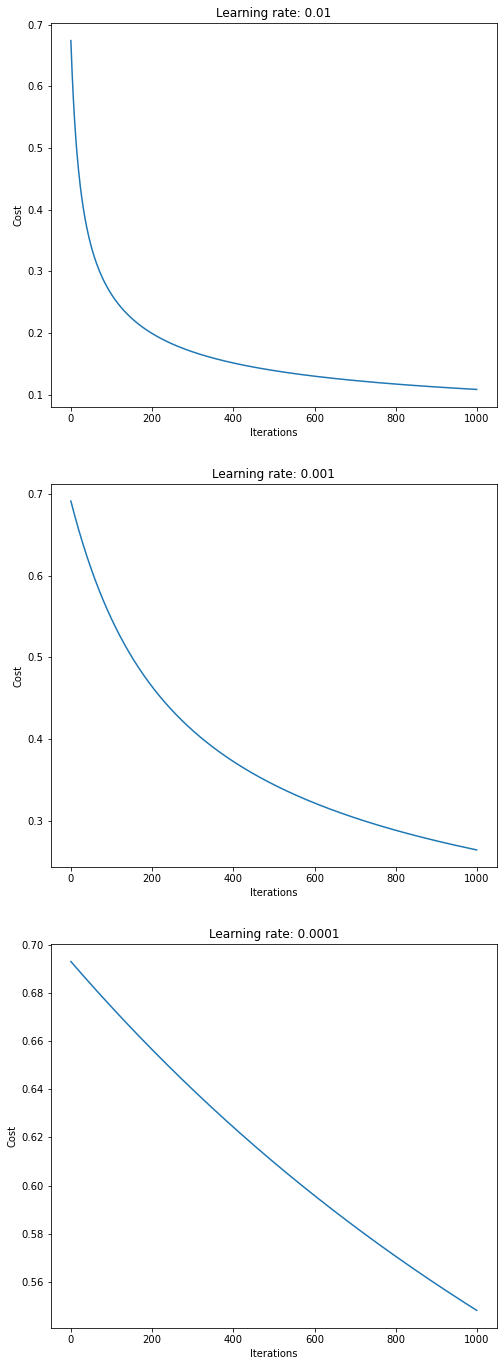

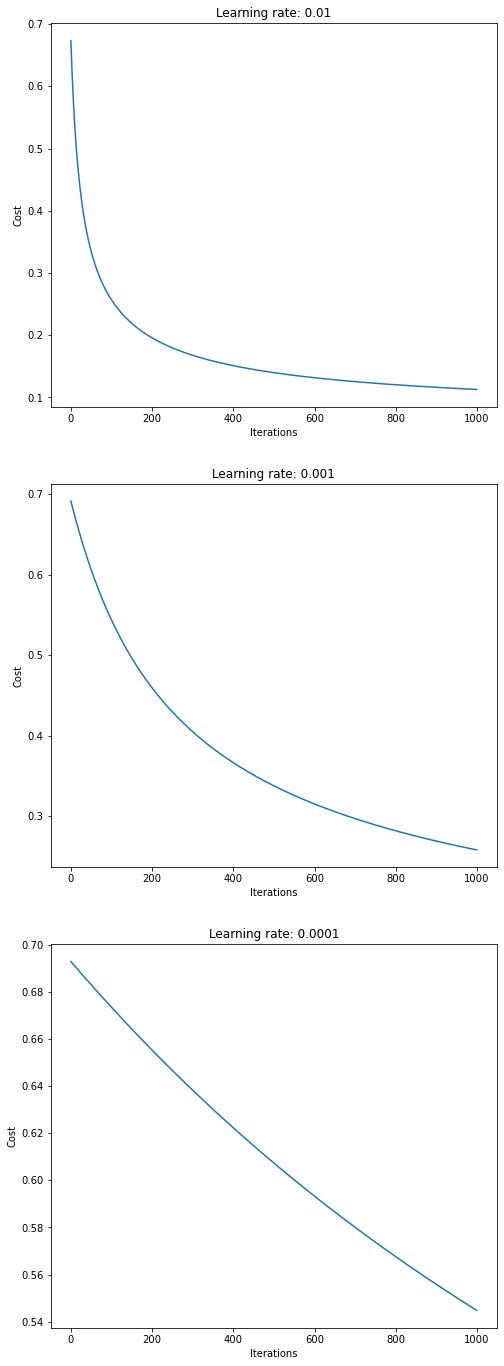

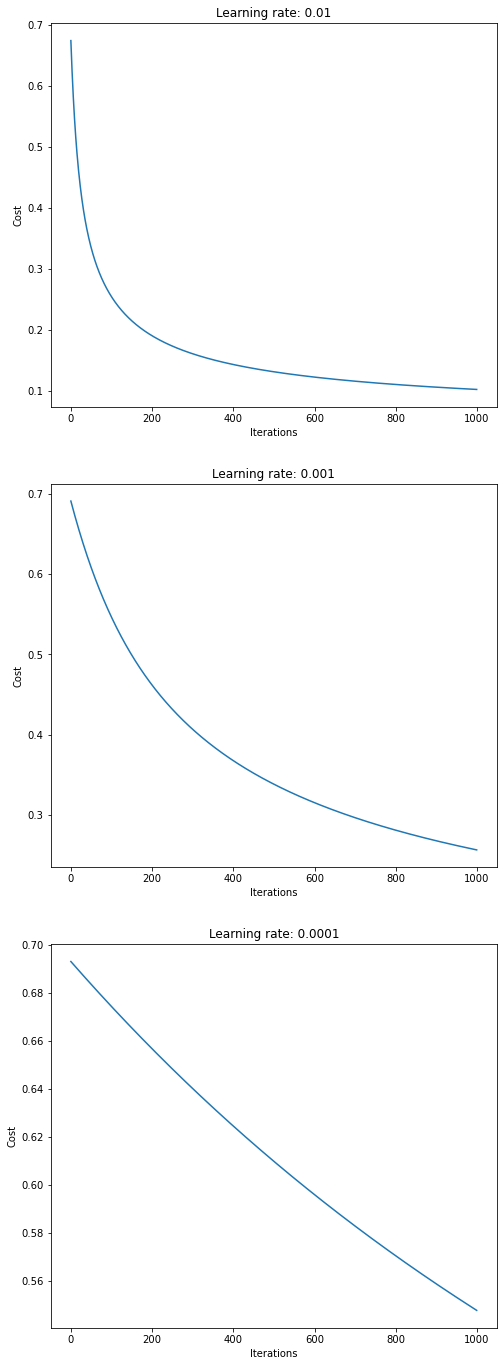

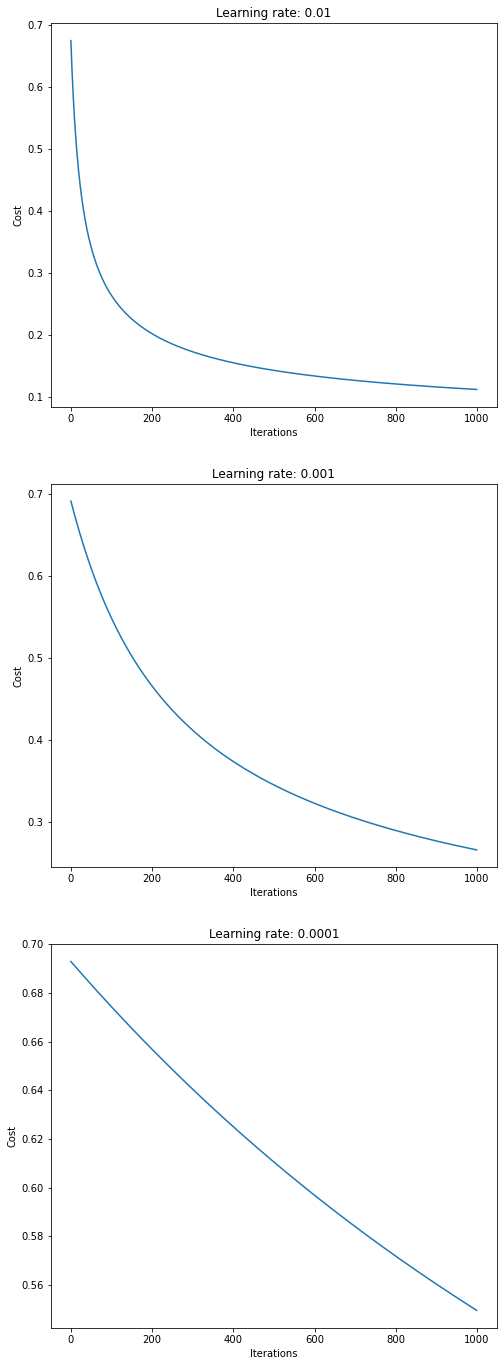

In [335]:
#LR1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Initializing weight vector
def intialize(X):
    w=np.zeros(X.shape[1]+1,1)
    X=np.c_([np.ones[X.shape[0],1],X])
    return w,X

#Defining sigmoid function
def sig(x):
    return 1/(1+np.exp(-x))

#Defining Cost function
def cost_func(theta, X, y):
    m = len(y)
    h = sig(X.dot(theta))
    J = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return J

#Defining Batch Gradient descent algorithm
def bg_d(X,y,aplha,num_iters):
    m,n=X.shape
    theta=np.zeros(n)
    cf=np.zeros(num_iters)
    for i in range(num_iters):
        h = sig(np.dot(X, theta))
        theta= theta-(alpha/m) * np.dot(X.T, (h - y))
        cf[i]=cost_func(theta, X, y)
    return theta,cf
print("LR1")
print("Batch Gradient")
c=1
for i in randomlist:
    #main function
    X_train=f.iloc[:,3:].sample(frac=0.67,random_state=i)
    Y_train=f.iloc[:,2].sample(frac=0.67,random_state=i)
    X_test=f.iloc[:,3:].drop(X_train.index)
    Y_test=f.iloc[:,2].drop(Y_train.index)
    print("TrialNo.",c)
    learning_rates=[0.01,0.001,0.0001]
    num_iters=1000
    fig, axs = plt.subplots(len(learning_rates), figsize=(8, 24))
    for i,alpha in enumerate(learning_rates):
        theta,cf=bg_d(X_train,Y_train,alpha,num_iters)

        #Plotting the learning curve
        axs[i].plot(range(num_iters), cf)
        axs[i].set_title(f'Learning rate: {alpha}')
        axs[i].set_xlabel('Iterations')
        axs[i].set_ylabel('Cost')
    
        # Test the model with varying decision probability thresholds
        thresholds = [0.5, 0.3, 0.4, 0.6, 0.7]
        accuracy_scores = []
        for threshold in thresholds:
            y_pred = (sig(np.dot(X_test, theta)) >= threshold).astype(int)
            accuracy_scores.append(np.mean(y_pred == y_test))
        print(f"Accuracy scores for learning rate {alpha}: {accuracy_scores}")
    c=c+1

Min-Batch Gradient
Trial 1
Threshold: 0.4, Learning Rate: 0.01
Accuracy: 1.00000


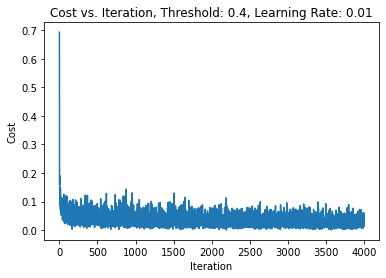

Threshold: 0.4, Learning Rate: 0.001
Accuracy: 0.95312


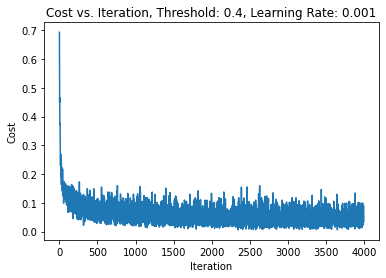

Threshold: 0.4, Learning Rate: 0.0001
Accuracy: 0.93750


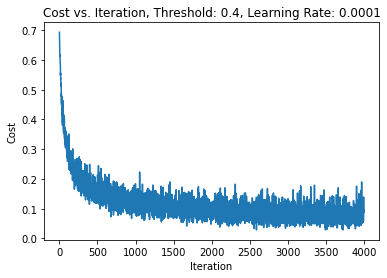

Threshold: 0.4, Learning Rate: 0.01
Accuracy: 1.00000


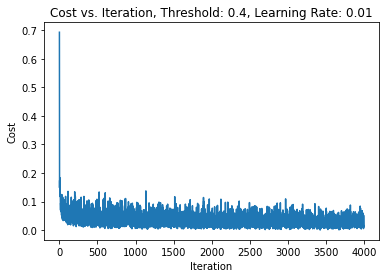

Threshold: 0.4, Learning Rate: 0.001
Accuracy: 0.96875


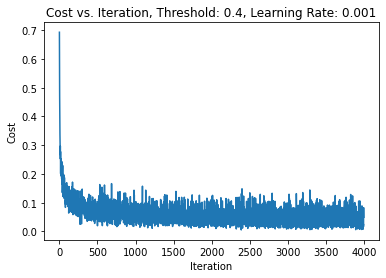

Threshold: 0.4, Learning Rate: 0.0001
Accuracy: 0.96875


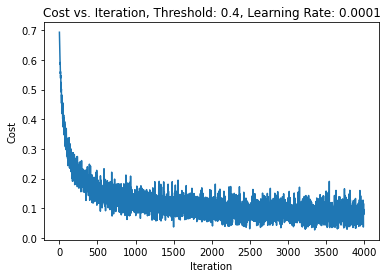

Threshold: 0.4, Learning Rate: 0.01
Accuracy: 1.00000


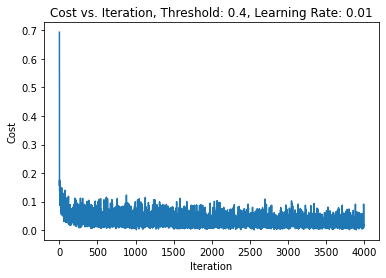

Threshold: 0.4, Learning Rate: 0.001


KeyboardInterrupt: 

In [356]:
def sigmoid_activation(result):
    final_result = 1/(1+np.exp(-result))
    return final_result

def mbg_d(X_train, Y_train, learning_rate, num_iter, batch_size, probability_threshold):
    # initialize weights
    weights = np.zeros(X_train.shape[1])
    bias = 0
    max_accuracy = 0
    chkptw = 0
    chkptb = 0
    accuracy = 0
    activated_output = 0
    costs = []
    epsilon = 1e-5
    nrows = X_train.shape[0]
    
    choices = np.random.choice(nrows, replace=False, size=batch_size)
    x_train = X_train.iloc[choices]
    y_train = Y_train.iloc[choices]
    for i in range(int(num_iter)):
        weighted_sum = np.dot(x_train, weights) + bias
        # activate
        activated_output = sigmoid_activation(weighted_sum)

        # calculate error
        error = y_train - activated_output

        cost = -np.mean(y_train*np.log(activated_output + epsilon) + (1-y_train)*np.log(1-activated_output + epsilon))
        costs.append(cost)

        # adjust weights
        weights += learning_rate * np.dot(x_train.T, error)
        # adjust bias
        bias += learning_rate * error.sum()
        # calculate accuracy
        predictions = np.where(activated_output >= probability_threshold, 1, 0)
        accuracy = (predictions == y_train).mean()
        if accuracy > max_accuracy:
            max_accuracy = accuracy
            chkptw = weights
            chkptb = bias
        choices = np.random.choice(nrows, replace=False, size=batch_size)
        x_train = X_train.iloc[choices]
        y_train = Y_train.iloc[choices]

    print("Accuracy: {:.5f}".format(accuracy))
    plt.plot(costs)
    return chkptw, chkptb


# Initialize thresholds and learning rates
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
learning_rates = [0.01, 0.001, 0.0001]

print("Min-Batch Gradient")
c=1
for i in randomlist:
    print("Trial",c)
    # Iterate over all combinations of thresholds and learning rates
    for i in thresholds:
        for learning_rate in learning_rates:
            print(f"Threshold: {threshold}, Learning Rate: {learning_rate}")
            w, bias = mbg_d(X_train, Y_train, learning_rate=learning_rate, num_iter=4000, batch_size=64, probability_threshold=i)
            plt.title(f"Cost vs. Iteration, Threshold: {threshold}, Learning Rate: {learning_rate}")
            plt.xlabel("Iteration")
            plt.ylabel("Cost")
            plt.show()
    c=c+1

Stochaistic Gradient
Trial 1
Threshold: 0.5, Learning Rate: 0.01
Accuracy: 0.98143


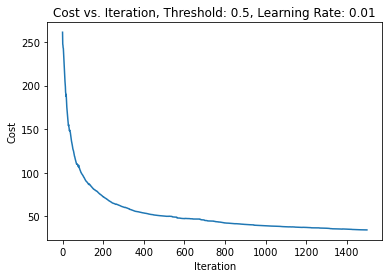

Threshold: 0.5, Learning Rate: 0.001
Accuracy: 0.95225


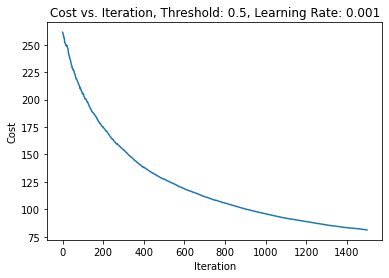

Threshold: 0.5, Learning Rate: 0.0001
Accuracy: 0.93103


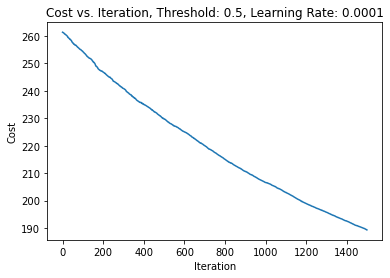

Threshold: 0.3, Learning Rate: 0.01
Accuracy: 0.95756


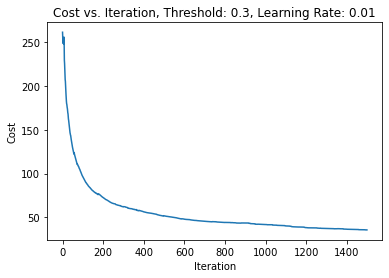

Threshold: 0.3, Learning Rate: 0.001
Accuracy: 0.87533


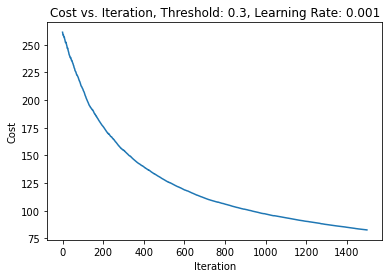

Threshold: 0.3, Learning Rate: 0.0001
Accuracy: 0.38196


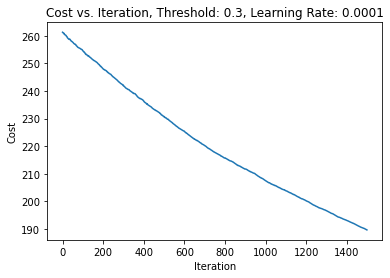

Threshold: 0.4, Learning Rate: 0.01
Accuracy: 0.97082


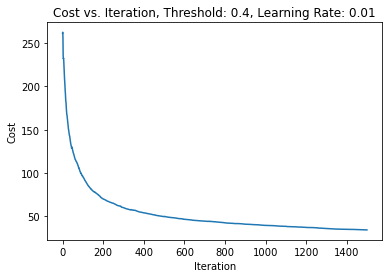

Threshold: 0.4, Learning Rate: 0.001
Accuracy: 0.93899


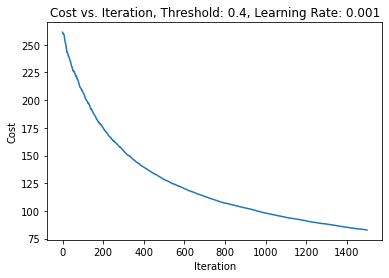

Threshold: 0.4, Learning Rate: 0.0001


KeyboardInterrupt: 

In [355]:
def compute_accuracy(X_train, Y_train, weights, bias, probability_threshold):
    accuracy = 0
    # weighted sum of inputs / weights
    weighted_sum = np.dot(X_train, weights) + bias
    # activate
    activated_output = sigmoid_activation(weighted_sum)
    # calculate accuracy
    predictions = np.where(activated_output >= probability_threshold, 1, 0)
    accuracy = (predictions == Y_train).mean()
    return accuracy

def sigmoid_activation(result):
    final_result = 1/(1+np.exp(-result))
    return final_result

def sg_d(X_train, Y_train, learning_rate, num_iter, probability_threshold):
    batch_size = 1
    
    # initialize weights
    weights = np.zeros(X_train.shape[1])
    bias = 0
    max_accuracy = 0
    chkptw = 0
    chkptb = 0
    accuracy = 0
    activated_output = 0
    costs = []
    epsilon = 1e-5
    nrows = X_train.shape[0]
    
    choices = np.random.choice(nrows, replace=False, size = batch_size)
    x_train = X_train.iloc[choices]
    y_train = Y_train.iloc[choices]
    for i in range(int(num_iter)):
        weighted_sum = np.dot(x_train, weights) + bias
        
        # activate
        activated_output = sigmoid_activation(weighted_sum)

        # calculate error
        error = y_train - activated_output

        total_weighted_sum = np.dot(X_train, weights) + bias
        total_activated_output = sigmoid_activation(total_weighted_sum)
        cost = -np.sum(Y_train*np.log(total_activated_output + epsilon) + (1-Y_train)*np.log(1-total_activated_output + epsilon))
        costs.append(cost)

        # adjust weights
        weights += learning_rate * np.dot(x_train.T, error)
        # adjust bias
        bias += learning_rate * error.sum()
        
        # calculate accuracy
        predictions = np.where(activated_output >= probability_threshold, 1, 0)
        accuracy = (predictions == y_train).mean()
        if accuracy > max_accuracy:
            max_accuracy = accuracy
            chkptw = weights
            chkptb = bias
        choices = np.random.choice(nrows, replace=False, size = batch_size)
        x_train = X_train.iloc[choices]
        y_train = Y_train.iloc[choices]
        
    accuracy = compute_accuracy(X_train, Y_train, weights, bias, probability_threshold = probability_threshold)
    print("Accuracy: {:.5f}".format(accuracy))
    plt.plot(costs)    
    return weights, bias

print("Stochaistic Gradient")
c=1
for i in randomlist:
    print("Trial",c)
    # Iterate over all combinations of thresholds and learning rates
    for threshold in thresholds:
        for learning_rate in learning_rates:
            print(f"Threshold: {threshold}, Learning Rate: {learning_rate}")
            w, bias = sg_d(X_train, Y_train, learning_rate=learning_rate, num_iter=randomlist, probability_threshold=threshold)
            plt.title(f"Cost vs. Iteration, Threshold: {threshold}, Learning Rate: {learning_rate}")
            plt.xlabel("Iteration")
            plt.ylabel("Cost")
            plt.show()
    c=c+1